In [82]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape
a = digits.images.reshape((digits.images.shape[0], -1))

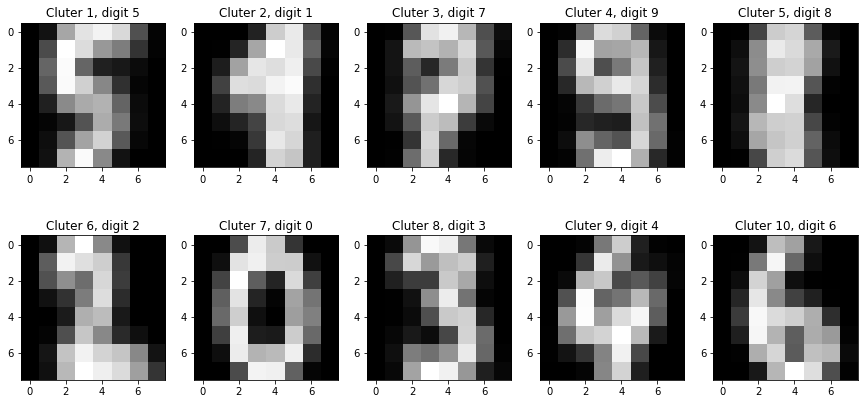

In [94]:
from scipy.cluster.vq import kmeans
def solve(k):
    centroids, q = kmeans(a, k)
    labels = get_labels(a, centroids)
    c = []
    for i in range(k):
        c.append(np.argmax(np.bincount(digits.target[labels == i])))
    b = np.array(list(map(c.__getitem__, labels)))
    return b, centroids, c

b, centroids, c = solve(10)
plt.figure(figsize=(15,15))
for i in range(10):
    plt.subplot(4, 5, i + 1)
    plt.title('Cluter {}, digit {}'.format(i+1, c[i]))
    plt.imshow(centroids[i].reshape((8, 8)), cmap='gray')

In [67]:
#2
def err(x, y):
    return np.count_nonzero(x != y)/x.size

for n in range(10):
    print(n, 'error =', err(digits.target[digits.target == n], b[digits.target == n]))
print('All errors', err(digits.target, b))


0 error = 0.0056179775280898875
1 error = 0.6978021978021978
2 error = 0.1638418079096045
3 error = 0.14207650273224043
4 error = 0.10497237569060773
5 error = 0.3076923076923077
6 error = 0.022099447513812154
7 error = 0.0223463687150838
8 error = 0.40804597701149425
9 error = 0.2388888888888889
All errors 0.21146355036171396


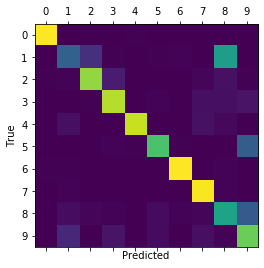

In [77]:
#3
amount = max(digits.target.max(), b.max()) + 1
sett =  np.array([[np.count_nonzero((b == j) & (digits.target == i)) for j in range(amount)] for i in range(amount)])
plt.matshow(sett)
plt.xticks(range(num_types))
plt.yticks(range(num_types))
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()
#0, 6 И 7 наиболее различимы

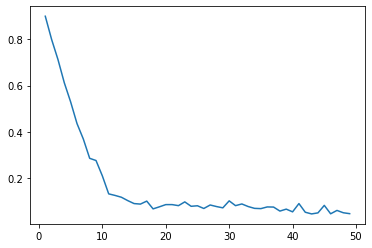

<Figure size 1800x1800 with 0 Axes>

In [80]:
#4

x = range(1, 50)
y = [err(digits.target, solve(i)[0]) for i in x]
plt.plot(x,y)
plt.figure(figsize=(25,25))
plt.show()

#Начиная с где то с 17-20 кластеров ошибка остается на одном уровне

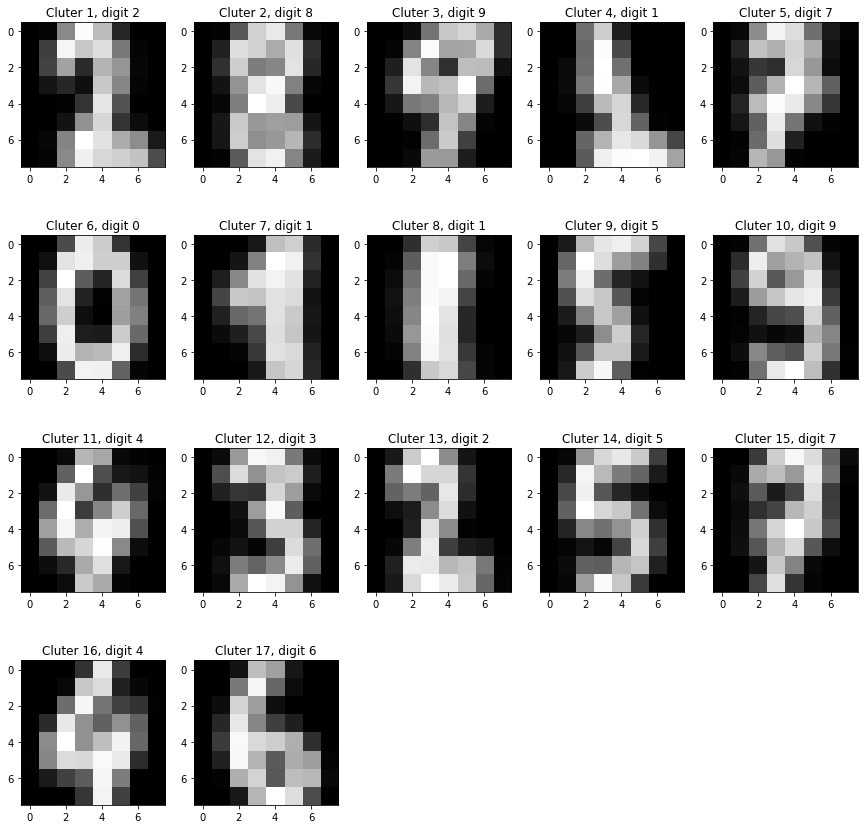

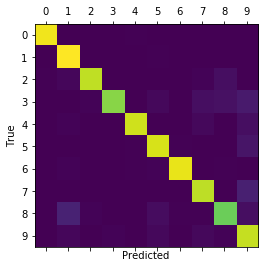

In [95]:
#5

b, centroids, c = solve(17)
plt.figure(figsize=(15,15))
for i in range(17):
    plt.subplot(4, 5, i + 1)
    plt.title('Cluter {}, digit {}'.format(i+1, c[i]))
    plt.imshow(centroids[i].reshape((8, 8)), cmap='gray')

amount = max(digits.target.max(), b.max()) + 1
sett =  np.array([[np.count_nonzero((b == j) & (digits.target == i)) for j in range(amount)] for i in range(amount)])
plt.matshow(sett)
plt.xticks(range(num_types))
plt.yticks(range(num_types))
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()
#Для 0, 3, 6, 8, 9 - один кластер, у остальных больше
#чем больше кластеров тем выше точность и меньше ошибок, судя по матрцие